In [2]:
#Importing the necessary files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance,anova_lm

In [3]:
#Loading Dataset
data=pd.read_csv('commonstats.csv')
data

,diet,preweight,weight6weeks,age
0,B,60,60.0,45
1,B,103,103.0,38
2,A,58,54.2,31
3,A,60,54.0,18
4,A,64,63.3,35
...,...,...,...,...
73,C,83,80.2,32
74,C,84,79.9,40
75,C,85,79.7,31
76,C,87,77.8,42


In [4]:
df=data.copy()

#### Display first few rows of dataset

In [5]:
#Dsiplay first few rows of dataset
df.head()

,diet,preweight,weight6weeks,age
0,B,60,60.0,45
1,B,103,103.0,38
2,A,58,54.2,31
3,A,60,54.0,18
4,A,64,63.3,35


##### The dataset contains diet type,preweight,weight after 6 weeks for one person and age

#### Checking the shape of dataset

In [6]:
df.shape

(78, 4)

##### The dataset contains 78 rows and 4 columns

#### Checking the data types of the columns for the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diet          78 non-null     object 
 1   preweight     78 non-null     int64  
 2   weight6weeks  78 non-null     float64
 3   age           78 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ KB


##### •	The diet column is categorical. While, preweight , weight6weeks and age are numerical.
##### •	There are no missing values in the dataset

#### Statistical summary of dataset

In [8]:
df.describe()

,preweight,weight6weeks,age
count,78.000000,78.000000,78.000000
mean,72.525641,68.680769,34.025641
std,8.723344,8.924504,8.543205
min,58.000000,53.000000,18.000000
25%,66.000000,61.850000,28.250000
50%,72.000000,68.950000,34.000000
75%,78.000000,73.825000,39.000000
max,103.000000,103.000000,54.000000


##### •	The average weight before any diet plan is 72.53 kg, while the average weight after 6 weeks of a diet plan is 68.68 kg. Overall, taking a diet has reduced the average weight.
##### 	The variation in the weights is very similar before and after taking a diet.



#### Exploratory Data Analysis

##### Value counts of diffrent types of diet

In [9]:
df.diet.value_counts()

diet
B    27
C    27
A    24
Name: count, dtype: int64

##### In the sample 27 people each took B and C while 24 took A

##### Creating a new column 'weight loss' and 'age category'

In [10]:
df['weight_loss']=df['weight6weeks']-df['preweight']
def  category(age):
    if age>=18 and age<25:
        return "18-25"
    elif age>=25 and age<40:
        return "25-40"
    else :
        return "40+"
df['age_category']=df['age'].apply(category)
df.head()

,diet,preweight,weight6weeks,age,weight_loss,age_category
0,B,60,60.0,45,0.0,40+
1,B,103,103.0,38,0.0,25-40
2,A,58,54.2,31,-3.8,25-40
3,A,60,54.0,18,-6.0,18-25
4,A,64,63.3,35,-0.7,25-40


##### Negative value indicates the effectivenss of diet in decreasing weight after 6 weeks

##### Value counts of diffrent types of age category

In [11]:
df.age_category.value_counts()

age_category
25-40    47
40+      19
18-25    12
Name: count, dtype: int64

##### 47 are in 25-40 while 19 and 12 are in 40+ and 18-25 category

#### Check for Missing Values

In [12]:
df.isnull().sum()

diet            0
preweight       0
weight6weeks    0
age             0
weight_loss     0
age_category    0
dtype: int64

##### Check for duplicate value

In [13]:
df.duplicated().sum()

0

#### Visualize data

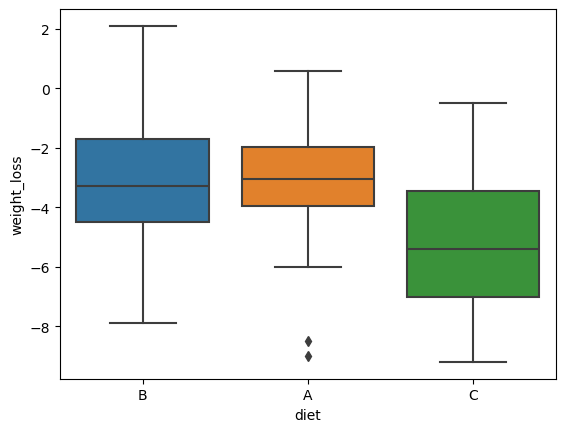

In [14]:
sns.boxplot(x='diet',y='weight_loss',data=df)
plt.show()

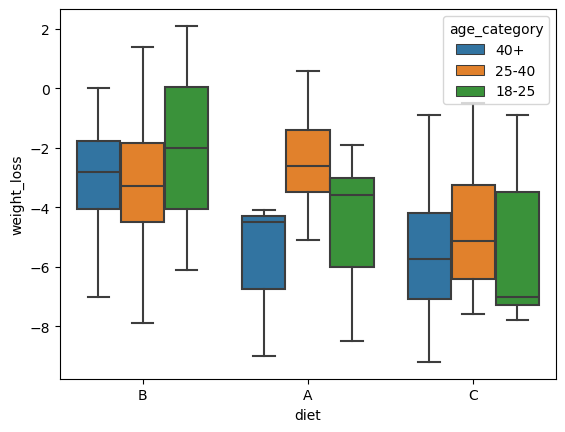

In [15]:
sns.boxplot(x='diet',y='weight_loss',hue='age_category',data=df)
plt.show()

#### Observation:-
##### Diffrent weight loss distribution among groups
##### C has highest wet loss
##### Median weight loss is very close for A and B but B has more variation as compared to A

#### Hypothesis Testing

##### Hypothesis-1

##### Define Null and alternate hypothesis for One way ANOVA
##### h0=The mean weight loses wrt to each diet category is equal
##### h1=At least one of the mean weight losses wrt the three diet category is unequal

In [16]:
#Find the P value
#Significance level is 5%
w,pvalue=stats.shapiro(df['weight_loss'])
print("The P-values is",pvalue)

The P-values is 0.8019888997077942


##### Since p-value of the test is larger than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

##### Levene's test
##### h0=All population variance are equal
##### h1=At least one variance is diffrent from the rest

In [18]:
# find the p-value
statistic, p_value=stats.levene(df[df['diet']=='A']['weight_loss'],
df[df['diet']=='B']['weight_loss'],
df[df['diet']=='C']['weight_loss']) 
print("The P-value is",p_value)

The P-value is 0.5376731304274011


##### Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances

In [19]:
# create separate variables to store the weightlosses with respect to the three diet-plans 
weightloss_diet_A=df[df['diet']=='A']['weight_loss']
weightloss_diet_B=df[df['diet']=='B']['weight_loss'] 
weightloss_diet_C=df[df['diet']=='C']['weight_loss']


In [21]:
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value=f_oneway(weightloss_diet_A, weightloss_diet_B, weightloss_diet_C) 
print('The p-value is ', p_value)


The p-value is  0.0032290142385893524


In [23]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the reject the alternate hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the alternate hypothesis')


As the p-value 0.0032290142385893524 is less than the level of significance, we reject the reject the alternate hypothesis


##### Inference
##### Since the p-value is less than the level of significance (5%), we reject the null hypothesis. Hence, we have enough statistical evidence to say that at least one of the mean weight losses with respect to the three diet-plans is different

##### Hypothesis-2
##### h0=The mean weight loss wrt each age category is equal
##### h1=At least one of the weigh loss wrt to the three age category is diffrent

In [24]:
#Using Levene test on null hypothesis
statistic,  p_value=stats.levene(df[df['age_category']=='40+']['weight_loss'],
df[df['age_category']=='25-40'] ['weight_loss'], df[df['age_category']=='18-25'] ['weight_loss'])
print('The p-value is', p_value)

The p-value is 0.12538330776005183


##### Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances

In [25]:
#Significance level is 0.05
#Collecting and preparing data
weightloss_Elderly=df[df['age_category']=='40+']['weight_loss']
weightloss_Middle_aged=df[df['age_category']=='25-40']['weight_loss'] 
weightloss_Young=df[df['age_category']=='18-25']['weight_loss']


In [27]:
#We will use the f_oneway() function from the scipy. stats library to perform a one-way ANOVA test.
from scipy.stats import f_oneway

# find the p-value
test_stat, p_value=f_oneway(weightloss_Elderly, weightloss_Middle_aged, weightloss_Young) 
print('The p-value is ', p_value)


The p-value is  0.05544168556142372


In [28]:
# print the conclusion based on p-value 
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis')

As the p-value 0.05544168556142372 is greater than the level of significance, we fail to reject the null hypothesis


##### Inference
##### Since the p-value is greater than the level of significance (5%), we fail to reject the null hypothesis. Hence, we have do not enough statistical evidence to conclude that the mean weight losses is different for at least one age category.

##### Hypothesis-3
##### Define null and alternative hypotheses for Two-Way ANONA
##### h0=The effect of d1et on we1ght_1oss does not depend on the effect of the age_category variable (a.k.a. no interaction effect)
##### h1=There is an interaction effect between diet and age_category on weight_1oss .
##### Significance level is 0.05



C:\Users\PREMRENA\Anaconda\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000001CE00EB58A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


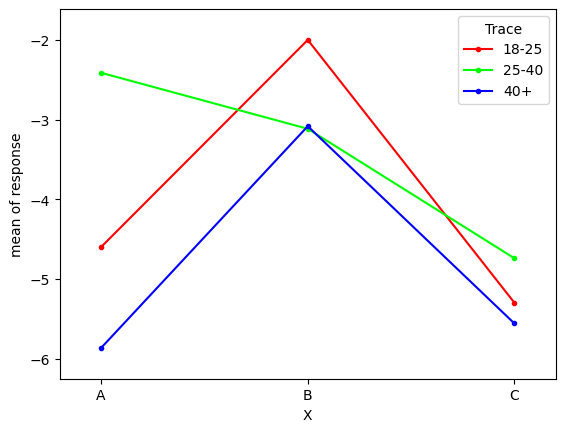

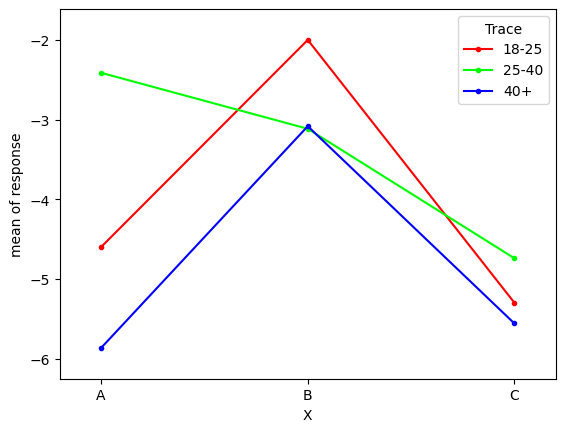

In [31]:
#Checking for Interaction effect
from statsmodels.graphics.factorplots import interaction_plot 
interaction_plot(np.array(df['diet']),np.array(df['age_category']),np.array(df['weight_loss']))

##### •	We can see that there is some sort of interaction between the d1et and age_category .

In [35]:
#Calculate the p-value
formula = 'weight_loss ~ C(diet) + C(age_category) + C(diet) :C(age_category) ' 
model = ols(formula, df).fit()
aov_table = anova_lm(model) 
(aov_table)


,df,sum_sq,mean_sq,F,PR(>F)
C(diet),2.0,71.093689,35.546845,6.399140,0.002822
C(age_category),2.0,17.498000,8.749000,1.574994,0.214359
C(diet):C(age_category),4.0,29.390330,7.347582,1.322711,0.270226
Residual,69.0,383.290930,5.554941,NaN,NaN


In [39]:
#Compare the p-value with a
row_name ='C(diet):C(age_category)' 
p_value_interaction=aov_table.loc[row_name, 'PR(>F)']
# print the conclusion based on p-value 
if p_value_interaction <0.05:
    print(f'As the p-value {p_value_interaction} is less than the level of significance, we reject the alternate hypothesis')
else:
    print(f'As the p-value {p_value_interaction} is greater than the level of significance, fail to reject the null hypothesis')


As the p-value 0.2702264784075801 is greater than the level of significance, fail to reject the null hypothesis
